## Simulate a linear data set

For this example, we are simulating a dataset of 100 values with some random noise that approximates `y = mX + b` where `m=10` and `b=5`

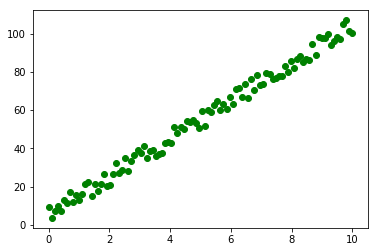

In [1]:
m = 10
b = 5
n = 100

import random
def y(x, m, b):
    return m*x + b
 
import numpy as np
X = np.linspace(0, 10, n)
y = [y(x, m, b) + np.random.uniform(low=-5, high=5) for x in X]

import matplotlib.pyplot as plt
plt.scatter(X, y, c='g')

plt.plot()
plt.show()

## Build a Linear Regression Model

Because we our dataset had random noise and was not sitting on a perfectly straight line, it will have slightly different values for `m` (coefficient) and `b` (intercept).  
<br>Let's build a Linear Regression model to determine these values.

In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X.reshape(-1, 1), y)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ 9.84432746]
Intercept: 
 5.82285519168


## Use Gradient Descent to manually determine `m` and `b`

Next we use gradient descent to manually determine the values of `m` and `b` for our dataset.<br>
First let's create some methods for the calculations.

In [3]:
from numpy import *

def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

Let's plug our dataset into the methods above

In [4]:
# Use the generated X and y values
points = np.column_stack((X,y))

learning_rate = 0.01
initial_b = 0          # initial y-intercept guess
initial_m = 0          # initial slope guess
num_iterations = 1000 

# Display the starting error
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(
    initial_b, 
    initial_m, 
    compute_error_for_line_given_points(initial_b, initial_m, points)))

print("Running...")

# Use gradient decent to determine the `m` and `b` values and the `error`
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

print("After {0} iterations b = {1}, m = {2}, error = {3}".format(
    num_iterations, 
    b, 
    m, 
    compute_error_for_line_given_points(b, m, points)))

Starting gradient descent at b = 0, m = 0, error = 3863.115656810893
Running...
After 1000 iterations b = 5.79355650128895, m = 9.848732817859284, error = 9.31491385054408


## Explore with the cost function

Create a cost function. Note that i

In [5]:
@np.vectorize # allow the cost function to be used in a meshgrid
def cost_function(m, b):
    ''' 
    Calculates the cost from an array of 'm' and 'b' values.
    Returns: an array of costs.
    '''
    n = len(X)
    total_error = 0.0
    for i, j in np.ndenumerate(X):
        i = i[0]
        total_error += (y[i] - (m*X[i] + b))**2
    return total_error / n

Check the `cost` for the values of `m` and `b` determined by our gradient descent method.<br>
Note that the cost is approximately the same as the error from th previous section.

In [6]:
print(m, b, cost_function(m, b))

9.84873281786 5.79355650129 9.31491385054408


## Plot the cost function output

In this section, we visually investigate the cost model.<br>
First, generate the `m` and `b` axis and cost values

### Surface plot

Set up the grid of values

In [7]:
mSpace = np.linspace(7, 12, 20)
bSpace = np.linspace(3, 7, 20)
θm, θb = np.meshgrid(mSpace, bSpace)
cost = cost_function(θm, θb)

Now plot the values

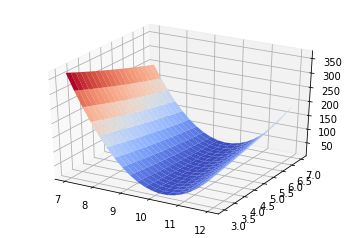

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(θm, θb, cost, cmap=cm.coolwarm)
plt.show()

### Contour plot

Set up the grid of values

In [9]:
mSpace = np.linspace(-100, 100, 20)
bSpace = np.linspace(-400, 400, 20)
θm, θb = np.meshgrid(mSpace, bSpace)
cost = cost_function(θm, θb)

Now plot the contours

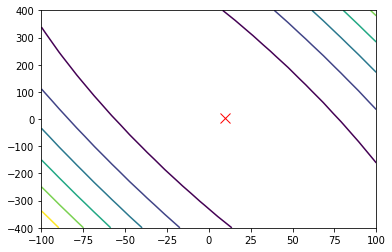

In [10]:
cont = plt.contour(θm, θb, cost)
plt.plot(m, b, marker='x', markersize=10, color="red")
plt.show()

### Plot table of values

Now print some of the cost values - notice the cost is lowest approximately at `m=10` and `b=5`

In [11]:
print("   θm     θb     cost")
print("----- ------ --------")
for θm in np.arange(9.5, 11, 0.5):
    for θb in np.arange(3, 7, 0.5):
        cost = cost_function(θm, θb).item(0)
        print("{0:5.1f}  {1:5.1f}    {2:5.2f}".format(θm, θb, cost))

   θm     θb     cost
----- ------ --------
  9.5    3.0    30.98
  9.5    3.5    26.68
  9.5    4.0    22.89
  9.5    4.5    19.59
  9.5    5.0    16.80
  9.5    5.5    14.50
  9.5    6.0    12.71
  9.5    6.5    11.41
 10.0    3.0    13.70
 10.0    3.5    11.91
 10.0    4.0    10.61
 10.0    4.5     9.82
 10.0    5.0     9.52
 10.0    5.5     9.73
 10.0    6.0    10.43
 10.0    6.5    11.64
 10.5    3.0    13.18
 10.5    3.5    13.88
 10.5    4.0    15.09
 10.5    4.5    16.79
 10.5    5.0    19.00
 10.5    5.5    21.70
 10.5    6.0    24.91
 10.5    6.5    28.62
